what is the smallest population size and number of generations to find a perfect solution with an individual size of 50?  Give your answer regarding individuals processed, usinf tournament selection

Using tournament selection (tournament size 3), the smallest population size that found a perfect solution was 186, with 106 generations needed, resulting in 19,716 individuals processed.  The population range was from 50-200 and the max number of generation was 5000

   # GA applied to OneMax

This notebook implements a simple GA in a fairly lowlevel way. In later examples we'll use more highlevel operators, but it is a very valuable exercise to ensure you understand what this code is actually doing. Make sure you understand the processes below before moving to the more high-level toolboxes!

Install DEAP. Note that if you are running this on your own computer you might not need to do this. In fact, it is better practice to install it so that it is always available, but when running on Colab, we do need this.

In [ ]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib).

In [ ]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters

In [ ]:
# Genetic Algorithm constants:
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 5000


Set any problem-specific constants here. In this case we need to know how long the string is.

In [ ]:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

Set the random seed. This is important so that we can reproduce runs later on.

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Create our toolbox. Note that we can pull in a bunch of predefined operators to tailor our Evolutionary Algorithm, which, of course, in this case is a GA. Notice that it is possible to create our **own** operators and functions to use, which is what we do with our **oneMaxFitness** function below.

In [ ]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament,tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)



Here is the main GA loop. We will iterate through it up to the MAX_GENERATIONS parameter and then print out our best individual.

In [ ]:
# Run GA for a given population size
 # set a high max to ensure solution is found

def loop(pop_size):
    random.seed(RANDOM_SEED)
    population = toolbox.populationCreator(n=pop_size)
    maxFitnessValues = []
    meanFitnessValues = []

    # calculate fitness tuple for each individual in the population:
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
      individual.fitness.values = fitnessValue

    for generationCounter in range(1, MAX_GENERATIONS + 1):
        # Selection
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Mutation
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

         # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # Replace population
        population[:] = offspring

        # Check if perfect solution found
        fitnessValues = [ind.fitness.values[0] for ind in population]
        maxFitnessValues.append(max(fitnessValues))
        meanFitnessValues.append(sum(fitnessValues)/len(population))
        if max(fitnessValues) == ONE_MAX_LENGTH:
            individuals_processed = pop_size * generationCounter
            return generationCounter, individuals_processed, maxFitnessValues, meanFitnessValues

    # If not found after MAX_GENERATIONS
    return None, None, None, None

# Search for the population size d
result = None
min_individuals = float('inf')

for psize in range(50, 201):  # populations from 10 to 200
    generations_needed, individuals_processed, maxFit, meanFit = loop(psize)
    if generations_needed is not None:
        if individuals_processed < min_individuals:
            min_individuals = individuals_processed
            result = (psize, generations_needed, individuals_processed, maxFit, meanFit)
        print(f"Pop {psize}  Perfect solution in {generations_needed} generations, {individuals_processed} individuals processed")

if result:
    print("\n Final configuration:")
    print(f"Smallest population size : {result[0]}")
    print(f"smallest Generation size: {result[1]}")
    print(f"Individuals processed = {result[2]}")
else:
    print("Could not find a perfect solution in given population range")


Pop 50  Perfect solution in 1636 generations, 81800 individuals processed
Pop 51  Perfect solution in 878 generations, 44778 individuals processed
Pop 52  Perfect solution in 1068 generations, 55536 individuals processed
Pop 53  Perfect solution in 1130 generations, 59890 individuals processed
Pop 54  Perfect solution in 1117 generations, 60318 individuals processed
Pop 55  Perfect solution in 1095 generations, 60225 individuals processed
Pop 56  Perfect solution in 1432 generations, 80192 individuals processed
Pop 57  Perfect solution in 730 generations, 41610 individuals processed
Pop 58  Perfect solution in 1384 generations, 80272 individuals processed
Pop 59  Perfect solution in 1188 generations, 70092 individuals processed
Pop 60  Perfect solution in 1367 generations, 82020 individuals processed
Pop 61  Perfect solution in 713 generations, 43493 individuals processed
Pop 62  Perfect solution in 1095 generations, 67890 individuals processed
Pop 63  Perfect solution in 1740 generati

scroll down the result to see the final result:
Using tournament selection (tournament size 3), the smallest population size that found a perfect solution was 186, with 106 generations needed, resulting in 19,716 individuals processed.  The population range was from 50-200 and the max number of generation was 5000

Now that we're done, let's print out some statistics. Generally we record (at least) the max and average over time.

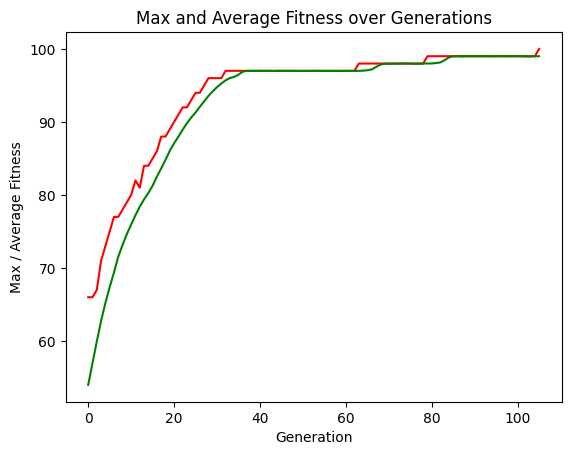

In [ ]:
# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(result[3], color='red')
plt.plot(result[4], color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()